In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf



import warnings
warnings.filterwarnings('ignore')

# Introducción

La industria Tecnológica es una de las que ha tenido un crecimiento sostenido y notable en los últimos años; por ejemplo, en 2020, el año más fuerte de la pandemia del COVID-19, en el cual muchas industrias decrecieron notablemente, la industria Tech consiguió un aumento del 4.2% en Estados Unidos, y se ha colocado en el tercer lugar como motor económico mundial.

Dado que el principal activo generador de riqueza en esta industria son los propios trabajadores que logran desarrollar nuevas implementaciones, una de las principales inversiones serán los salarios de estos, para poder atraer a los mejores y motivarlos a mejorarse constantemente; simplemente en México, un país que apenas comienza a adoptar en mayor escala esta industria, los salarios promedio que ofrecen son alrededor del 8% más alto en comparación con el resto de las industrias.

Una idea general que existe en el mundo laboral es que, a mayor educación, se tendrá un mejor salario, sin embargo, esta industria tiende a romper paradigmas, así que analizaremos cuales son los factores que influyen en el salario de los empleados de la industria Tech, a partir de una base que recopila información básica de trabajadores en esta industria como puesto, compañía, salario y algunas variables independientes del trabajador.

### Objetivo:

Determinar cuáles son los variables que más impactan en tener un salario competitivo en una empresa Tech.

### Hipótesis

* El salario anual está condicionado por el estado (US)
* El salario anual está condicionado por los años de experiencia
* En US se gana más que en el resto de los países
* Variables como género o ascendencia racial no influyen en el salario para esta industria


# Data Wrangling

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
data.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

### Limpieza de variables que no nos sirven

Lo primero que notamos en este data set, es que existían columnas que contenían la misma información solo que en formato desagregado, las columnas de “raza” y educación, tienen su propia columna independiente donde registran para cada registro cual es su valor en este caso, sin embargo, estas mismas columnas están desagregadas por cada valor existente, en cada una de estas columnas desagregadas encontramos valores de 1 y 0 (tiene la característica o no tiene la característica).

Para nuestro trabajo, es más útil manejar estos datos en una sola columna, por lo cual quitaremos las columnas desagregadas para tener un dataset más limpio.

La columna ‘level’ no tiene categorías comparables entre sí dado que cada compañía asigna el nivel del empleado a su modo, por ello no la podremos utilizar y podemos retirarla del data set.

La columna ‘tag’ es solo una referencia al título del puesto, no nos es útil para el modelo.

Por úlitmo, las columnas ‘dma id’ y ‘city id’ son codigos de geolocalización que no sirven para los propósitos de la investigación.


In [4]:
data.drop(columns=['level', 'tag', 'otherdetails', 'cityid','dmaid','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic'
],inplace=True)

In [5]:
data = data.rename(columns={
        'totalyearlycompensation':'Anual_Salary',
        'yearsatcompany':'Years_in_Company'
            })

## Limpiar NaN's

<AxesSubplot: >

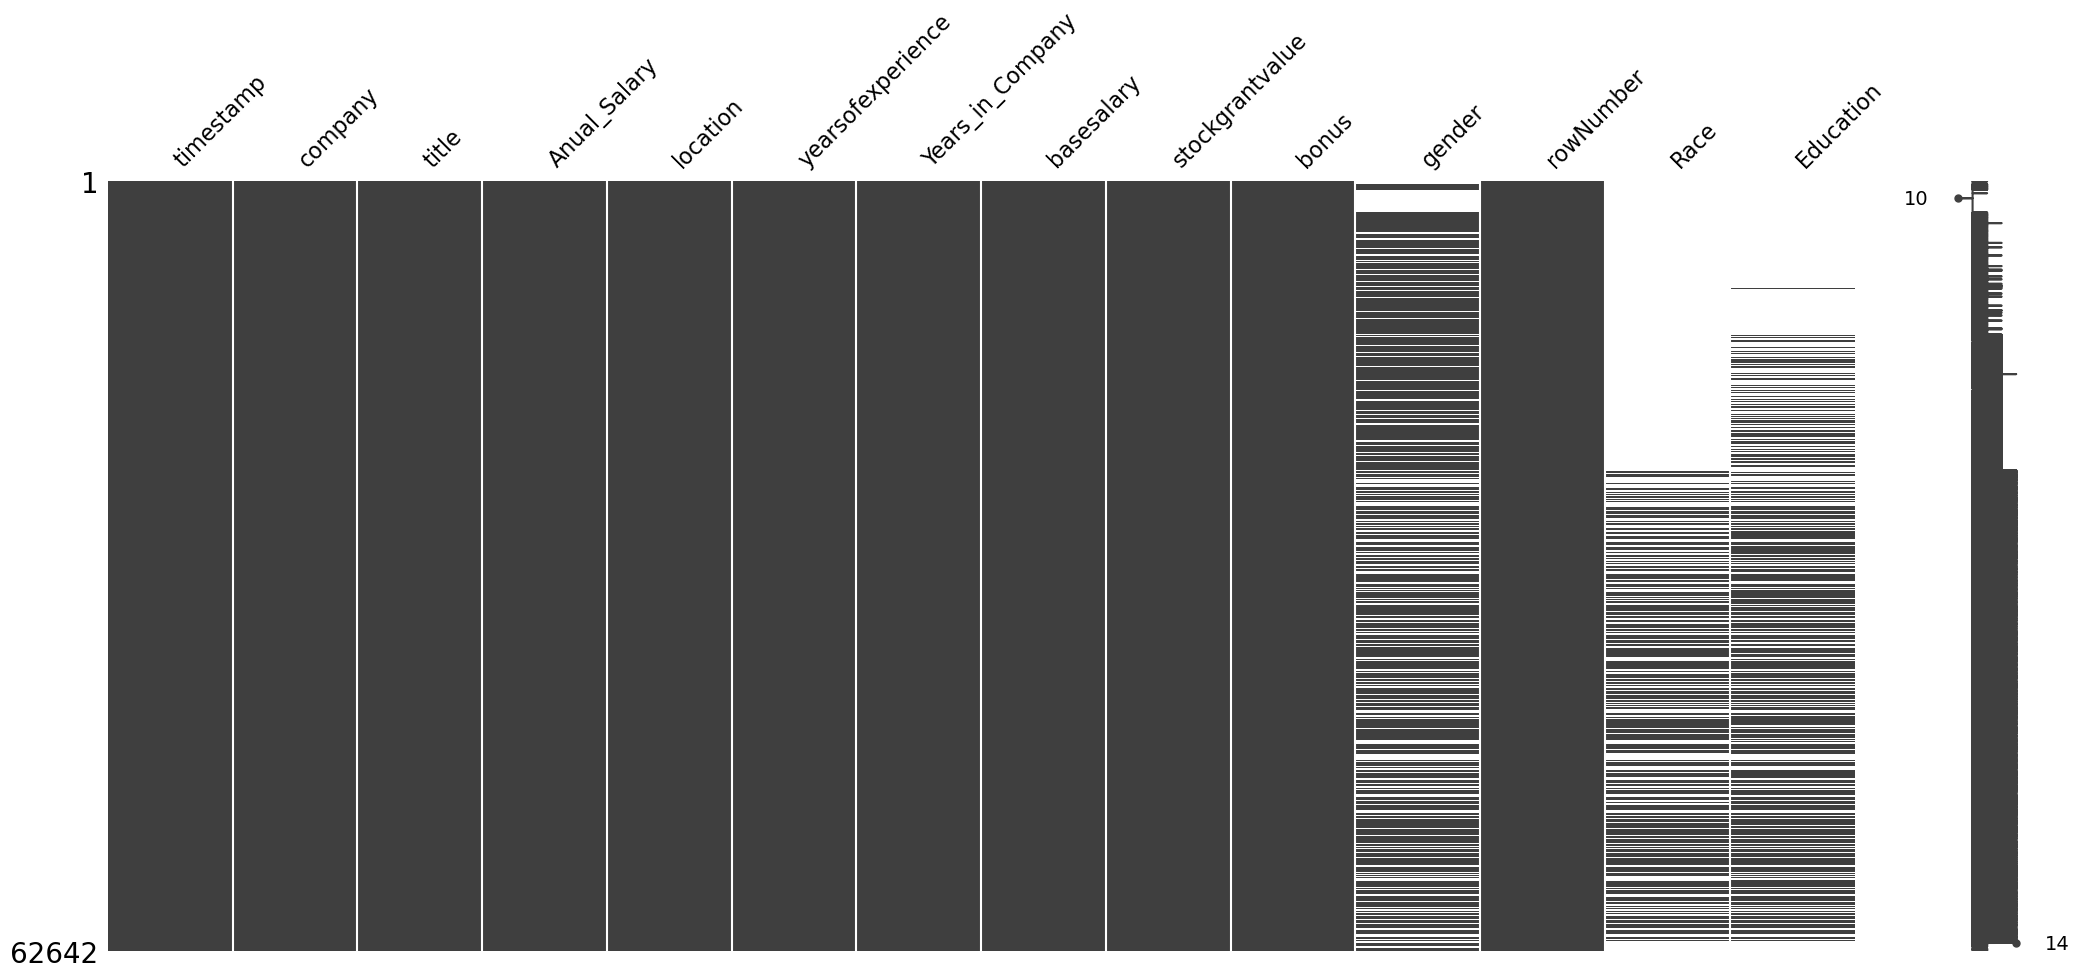

In [6]:
msno.matrix(data)

Como podemos ver, las variables que tienen más valores nulos son las variables de género, 'raza' y Educación, dado que estás últimas dos son variables que tienen más peso en la investigación, les daremos prioridad al momento de eliminar valores.

Para este caso hicimos una limpieza jerarquica, al momento de quitar valores nulos de la variable educación, se pueden eliminar otros de igual manera principalmente para la variable 'raza', coprometiendo lo menos posible los datos de esta primer columna.

Se repite el proceso con las variables género y raza.

In [7]:
data.dropna(subset=['Education'],inplace=True)
data.dropna(subset=['gender'],inplace=True)
data.dropna(subset=['Race'],inplace=True)

print(data.isnull().sum())
print(data.shape)

timestamp            0
company              2
title                0
Anual_Salary         0
location             0
yearsofexperience    0
Years_in_Company     0
basesalary           0
stockgrantvalue      0
bonus                0
gender               0
rowNumber            0
Race                 0
Education            0
dtype: int64
(21591, 14)


### Crear variables numéricas para las variables cualitativas Educación, Raza y género

Las columnas Raza y Educación mencionadas anteriormente están en formato string pues son variables cualitativas, sin embargo, al momento de trabajar con un modelo de regresión es más fácil hacerlo con variables cuantitativas, por lo cual asignamos valores numéricos a cada variable cualitativa en una nueva columna.

In [8]:
CondicionesG=[data['gender']=='Male',data['gender']=='Female', data['gender']=='Other']
OpcionesG=[1,2,3]

data['Gender #']=np.select(CondicionesG,OpcionesG)

In [9]:
CondicionesR=[data['Race']=='White',data['Race']=='Asian',data['Race']=='Black',data['Race']=='Two Or More',data['Race']=='Hispanic']
OpcionesR=[1,2,3,4,5]

data['Race #']=np.select(CondicionesR,OpcionesR)

In [10]:
CondicionesE=[data['Education']=='Highschool',data['Education']=='Some College',data['Education']=="Bachelor's Degree",data['Education']=="Master's Degree",data['Education']=='PhD']
OpcionesE=[1,2,3,4,5]

data['Education #']=np.select(CondicionesE,OpcionesE)

### Convertimos el timestamp en solo una fecha, para evitar que la el dato de la hora nos genere algún inconveniente

In [11]:
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.date

### Separar la variable de locación

Separamos la variable de locación en ciudad, estado y país, así podemos hacer un análisis cruzado más profundo y poder comparar diferentes regiones del mundo.

In [12]:
# Separar la locación por ciudad, estado y país
data[['city', 'state','country']] = data['location'].str.split(',', n=2, expand=True)

data['len'] = data['country'].str.len()
data['len'].fillna(0,inplace=True)
data['country'] = np.where(data['len']==0, 'US',data['country'])
data.drop(columns=['len'],inplace=True)


In [13]:
data.columns

Index(['timestamp', 'company', 'title', 'Anual_Salary', 'location',
       'yearsofexperience', 'Years_in_Company', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'rowNumber', 'Race', 'Education',
       'Gender #', 'Race #', 'Education #', 'city', 'state', 'country'],
      dtype='object')

# EDA

In [14]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Anual_Salary,21591.0,197845.77,133092.74,10000.0,119000.0,173000.0,245000.0,4980000.0
yearsofexperience,21591.0,7.12,5.85,0.0,3.0,6.0,10.0,45.0
Years_in_Company,21591.0,2.70,3.32,0.0,0.0,2.0,4.0,40.0
basesalary,21591.0,133862.40,57215.20,4000.0,100000.0,135000.0,165000.0,900000.0
stockgrantvalue,21591.0,44890.23,72449.75,0.0,0.0,20000.0,55000.0,954000.0
bonus,21591.0,18415.03,25083.23,0.0,3000.0,13000.0,25000.0,900000.0
rowNumber,21591.0,59202.76,14562.26,21208.0,47070.5,59842.0,71582.5,83875.0
Gender #,21591.0,1.19,0.40,1.0,1.0,1.0,1.0,3.0
Race #,21591.0,1.89,0.98,1.0,1.0,2.0,2.0,5.0
Education #,21591.0,3.46,0.67,1.0,3.0,3.0,4.0,5.0


Text(0, 0.5, '')

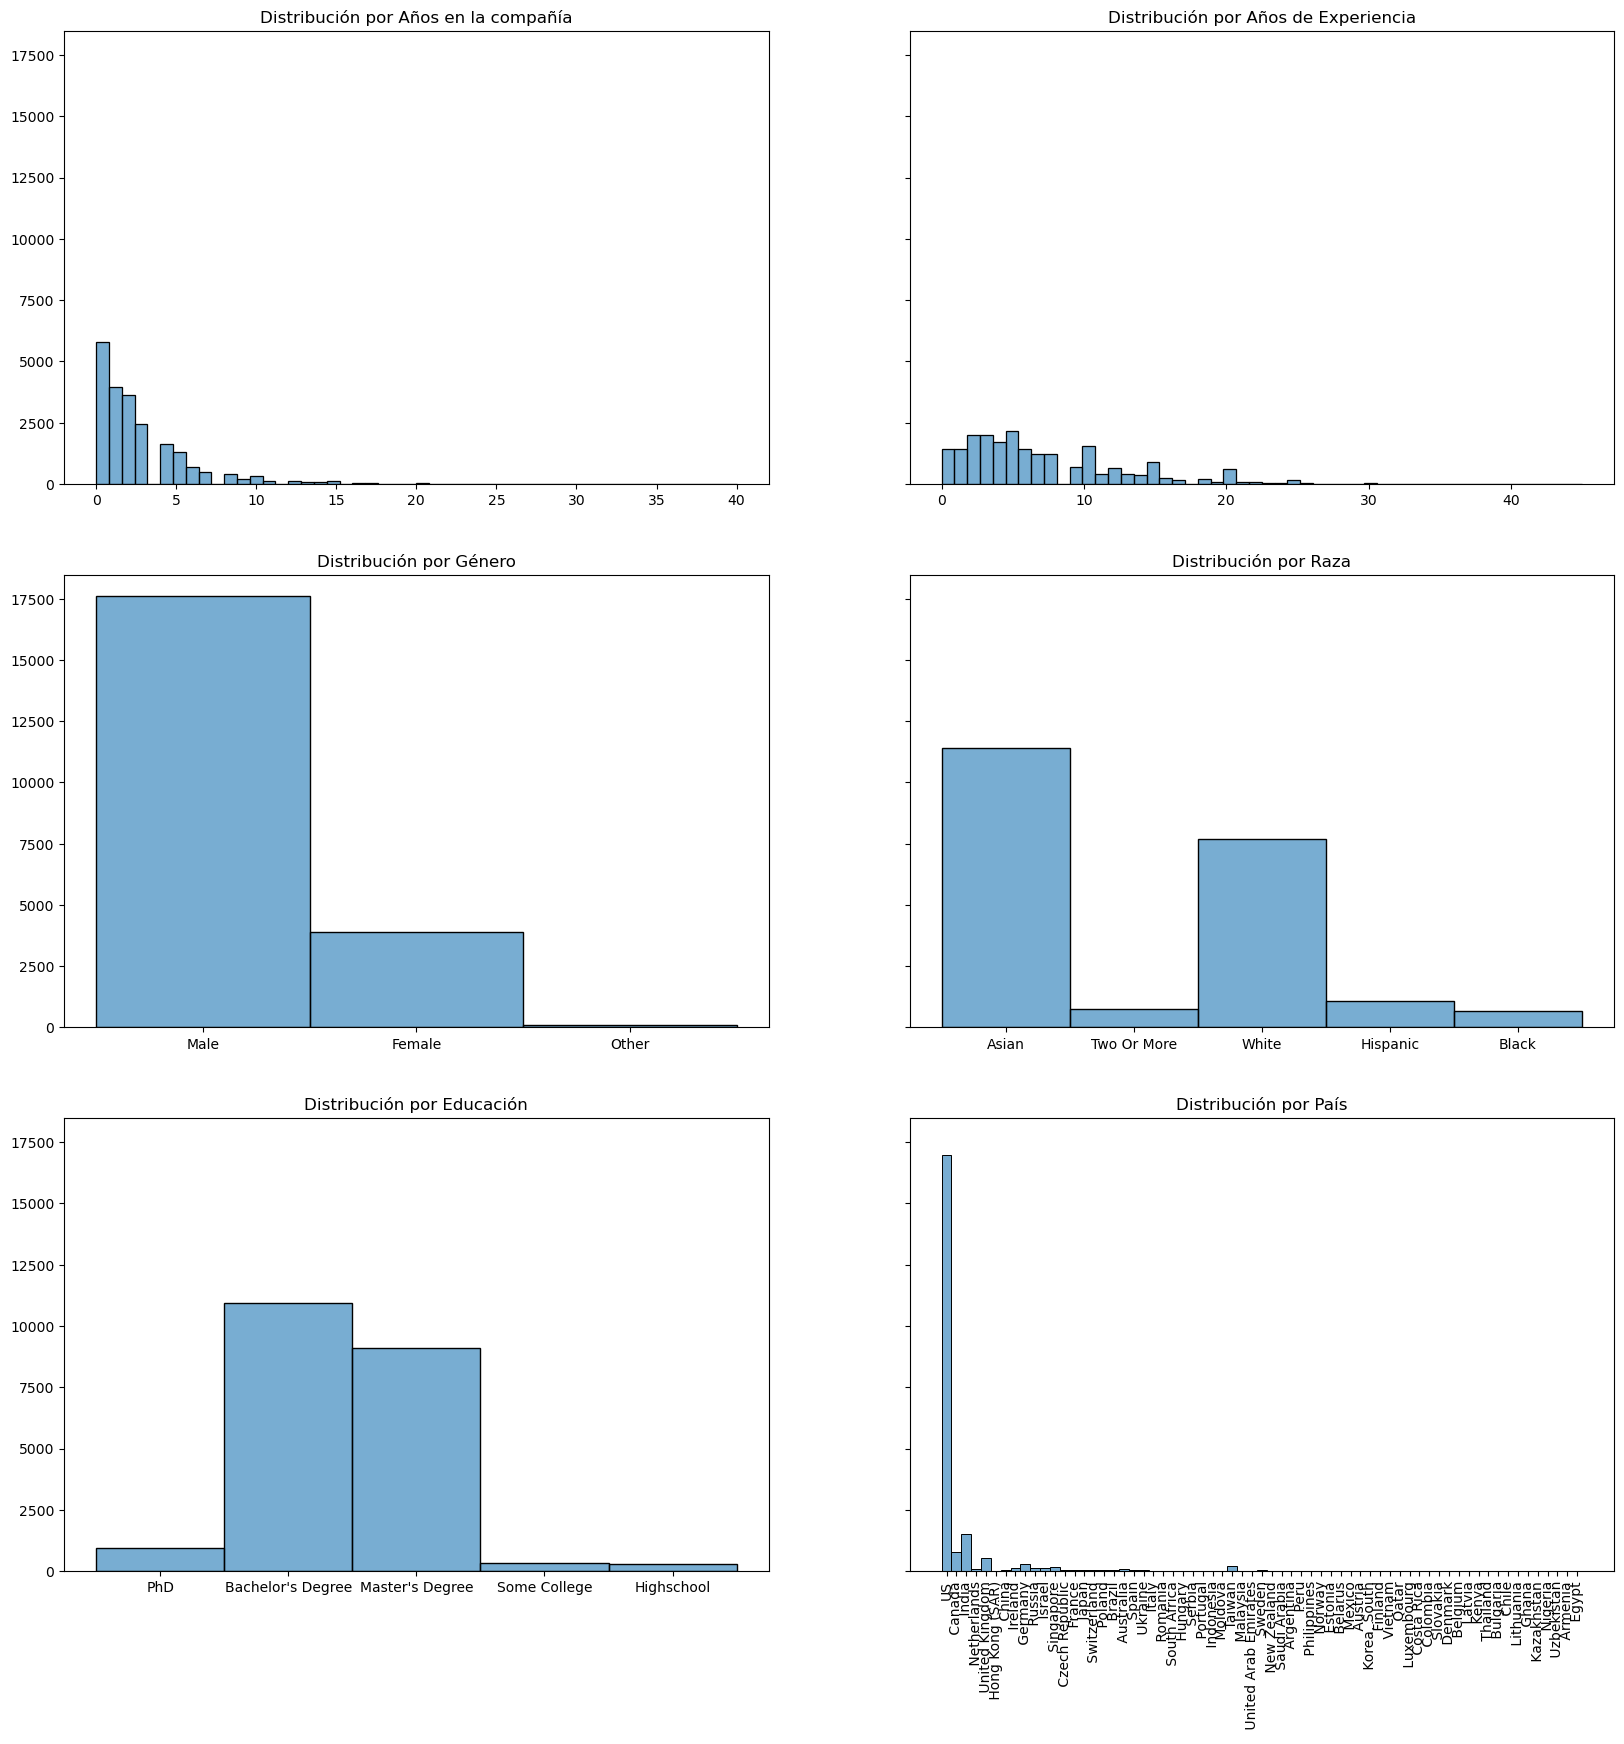

In [16]:
fig, ax = plt.subplots(3,2, figsize=(20, 20), sharey=True)

sns.histplot(ax=ax[2,1], data=data, x="country", bins=50, alpha=0.6)
ax[2,1].set_title('Distribución por País')
ax[2,1].set_xlabel('')
ax[2,1].set_ylabel('')

sns.histplot(ax=ax[0,0], data=data, x="Years_in_Company", bins=50, alpha=0.6)
ax[0,0].set_title('Distribución por Años en la compañía')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')


sns.histplot(ax=ax[1,1], data=data, x="Race", bins=50, alpha=0.6)
ax[1,1].set_title('Distribución por Raza')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')

sns.histplot(ax=ax[2,0], data=data, x="Education", bins=50, alpha=0.6,)
ax[2,0].set_title('Distribución por Educación')
plt.xticks(rotation=90)
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('')

sns.histplot(ax=ax[1,0], data=data, x="gender", bins=50, alpha=0.6,)
ax[1,0].set_title('Distribución por Género')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')

sns.histplot(ax=ax[0,1], data=data, x="yearsofexperience", bins=50, alpha=0.6,)
ax[0,1].set_title('Distribución por Años de Experiencia')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')


Desconocemos el sistema de recolección de datos mediante el cual fueron tomadas las muestras para la base de datos, sin embargo podemos observar que la distribución de los mismos es muy dispareja en sus principales variables explicativas.

No sabemos si esto es un reflejo de la distribución real de la industria y donde se concentran los trabajadores, o un error de muestreo; dada la naturaleza del trabajo, nos inclinaremos por la primer idea.

Existen ciertas características en el trabajador promedio de la industría Tech, suelen ser hombres de ascendencia asiatica o caucásica, residentes en USA, con licenciatura o maestría, y con menos de 10 años de experiencia, y menos de 5 años en su compañía.

Con este perfil, analizaremos como cada uno de estos aspectos afecta en su remuneración anual.

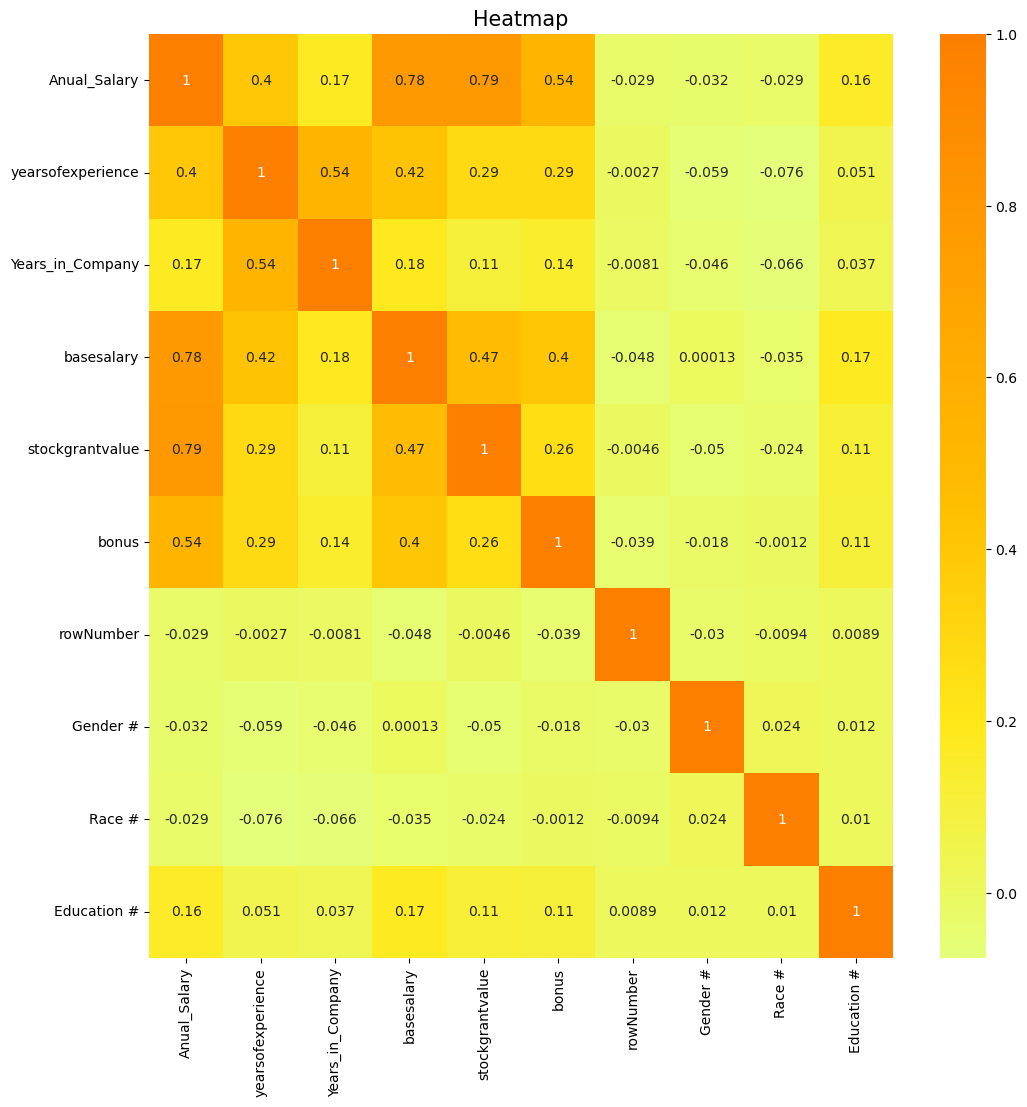

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='Wistia')
plt.title('Heatmap', fontsize=15)
plt.show()

Al hacer un mapa de calor podemos ver que las principales variables con las que el salario total anual tiene relación son las variables de años de experiencia y años en la compañía, de igual manera vemos correlación con variables que también involucran una compensación monetaria como lo son salario base (una variable que es parte del salario anual, por lo cual no resula de nuestro interés particular), bonos y el valor de las acciones.

Las correlaciones más fuertes con variables independientes se dan en las variables de Educación, años de experiencia y años en la compañía, así que ahondaremos en estas para la investigación.

La relación entre género y raza con la compensación anual total es negativa, por lo cual podemos comenzar a teorizar sobre la última hipótesis propuesta.

# Análisis Bivariado

### Salario versus País
Un primer análisis obligatorio dada la naturaleza de este data set que compara salarios de puestos Tech en diferentes países y con diferentes puestos, es haer un análisis salarial transversal entre los salarios de los diferentes países.

Lo primero que podemos ver es que los mínimos y máximos son muy contrastantes, a tal grado que el salario promedio más grande que existe entre estos paises es 26 veces más que el salario promedio del país con menor retribución en esta área.

Enfocando este análisis en países latinoamericanos, tenemos solo 7, y todos se encuentran debajo de la mediana, y po rlo menos 100,000 dolares debajo de la media (197,845.76 dlls), lo cual nos muestra la enorme brecha salarial que existe en el sur y un largo camino que recorrer para igualar la indusría a la de otros países.

Sin embargo, no hay una zona definida del planeta que sea la más óptima para ejercer este tipo de profesiones, podemos ver que en el top 10 hay 3 países Europeos y 4 Países asíaticos, aunque muy dispersos geográficamente entre sí.


In [19]:

df3_country = data[['Anual_Salary', 'country']].groupby(['country'], as_index=False).mean().sort_values(by='Anual_Salary', ascending=False)


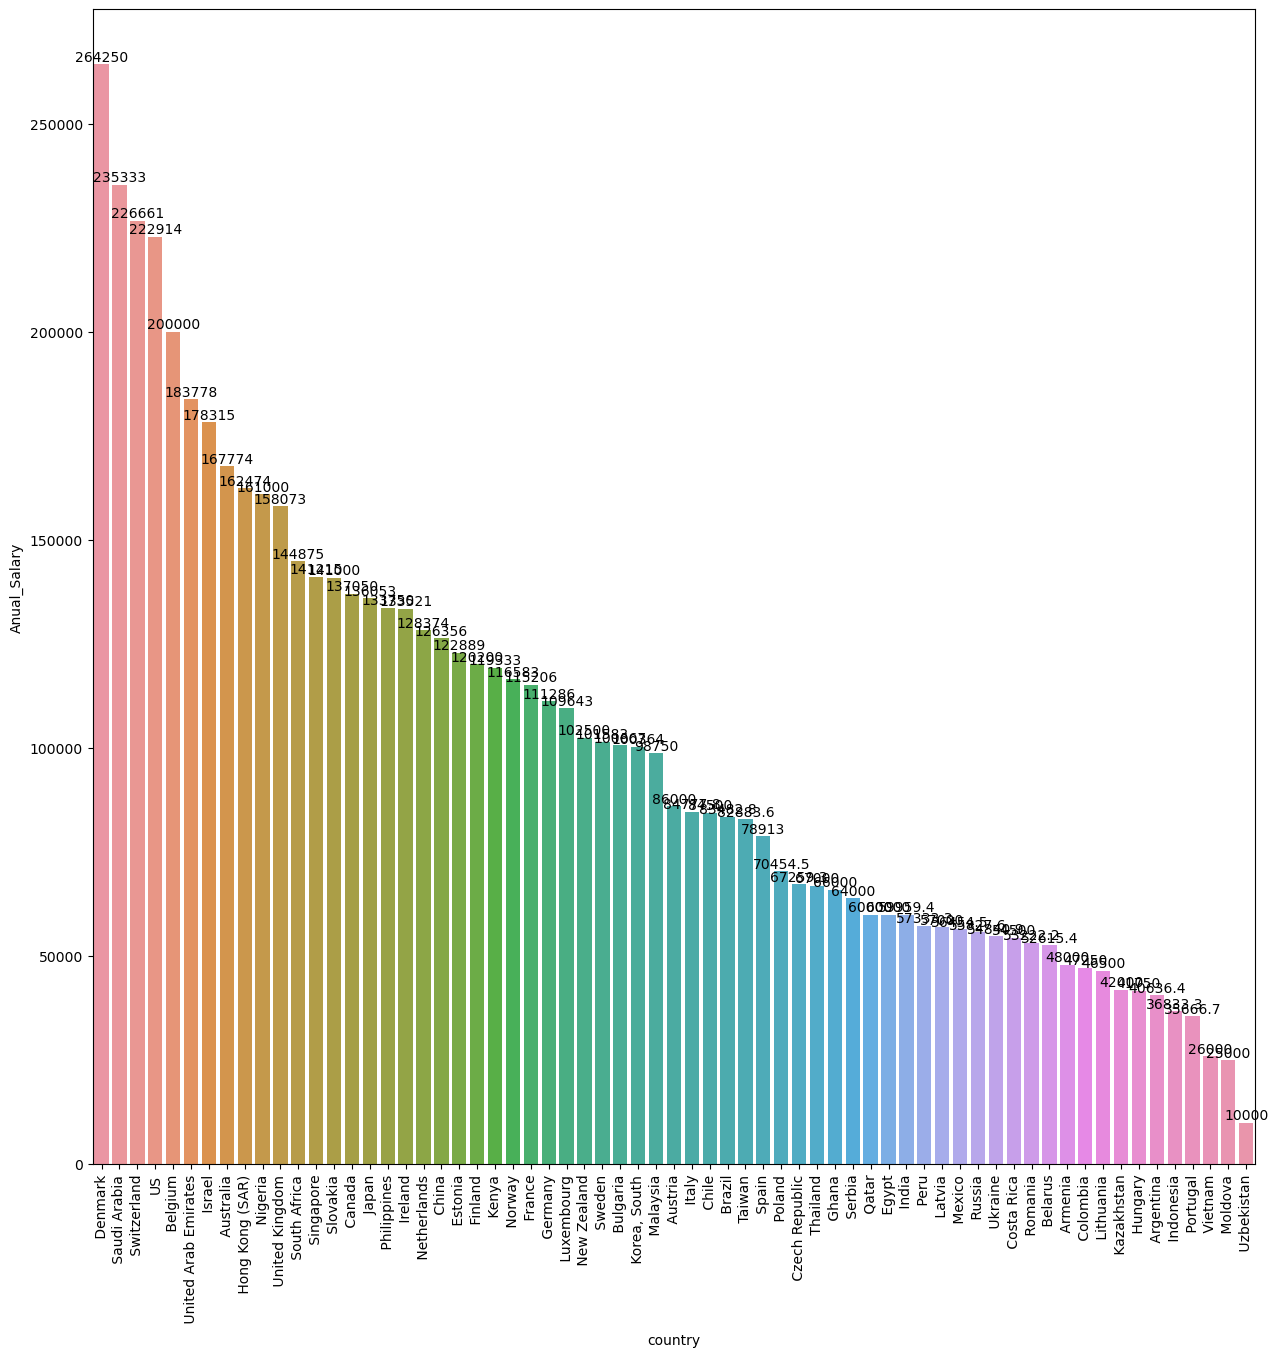

In [20]:

plt.figure(figsize=(15,15))
ax=sns.barplot(y='Anual_Salary', x='country', data=df3_country)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()



### Salario versus Años de experiencia
En cuestión de años de experiencia, una variable fuertemente relacionada con el salario Anual, vemos un fenómeno interesante, conforme se va aumentando en años de experiencia se va aumentando el salario anual hasta llegar al pico más alto que son 29 años en la industria Tech como el momento cumbre en cuestión salarial.

Sin embargo, desde los 24 años, el salario comienza a decaer o "estabilizarse" alrededor de los 336,000 dlls, es decir, y posterior a los 30 años de experiencia, llega incluso a decaer fuertemente.

El momento cumbre para un trabajador de la industría Tech parace ser posterior a los 20 años.


In [21]:
df_years = data[['Anual_Salary', 'yearsofexperience']].groupby(['yearsofexperience'], as_index=False).mean().sort_values(by='Anual_Salary', ascending=True)


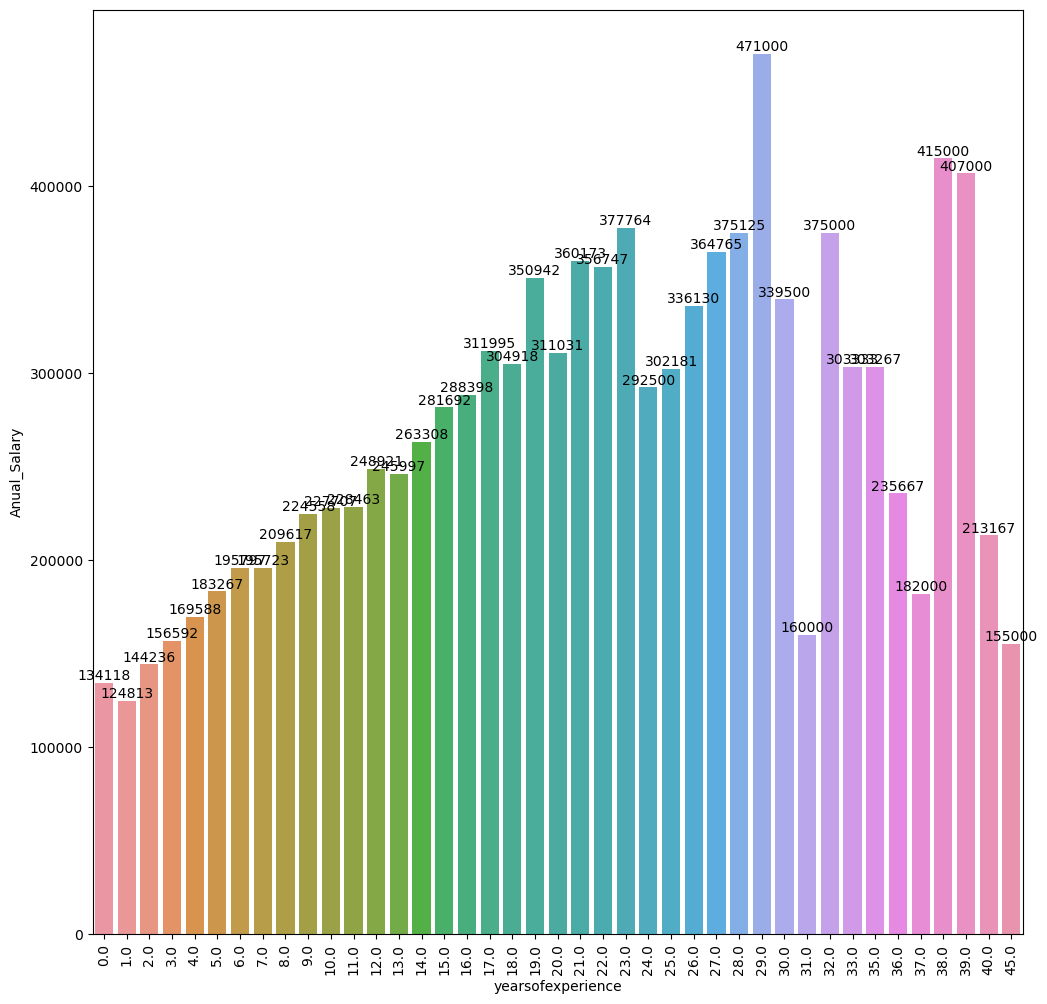

In [22]:
plt.figure(figsize=(12,12))
ax=sns.barplot(y='Anual_Salary', x='yearsofexperience', data=df_years)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()


### Salario Anual versus puesto

Dentro de la industria Tech se requieren diferentes tipos de puesto, no solo analistas o ingenieros; podemos encontrar datos interesantes como que un vendedor tenderá a ganar más que un Data Scientist o un Ingeniero de Hardware, sin embargo, el Top 5 de este gráfica sí se lo llevan puestos relacionados directamente con la producción/desarrollo, ingenieros, técnicos o managers siguen siendo los mejor recompensados.


In [23]:
df_title = data[['Anual_Salary', 'title']].groupby(['title'], as_index=False).mean().sort_values(by='Anual_Salary', ascending=True)


In [24]:
fig = px.bar(df_title, x="title", y="Anual_Salary", color="title", text_auto='.2s')

fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

fig.show()


### Salario contra Raza y Educación
En esta última sección análizamos dos variables a la vez, pues su impacto en la variable dependiente aunque puede ser individual, también se pueden encontrar particularidades en conjunto


In [25]:
df_race = data[['Anual_Salary', 'Race']]
df_edu = data[['Anual_Salary', 'Education']]


En cuestión de raza contra salario, encontramos que la mayoría de los datos parecen estar distribuidos dentro de un mismo rango, sin embargo, al momento de checar los promedios por raza encontramos que las personas "Blancas" o que tienen dos o más ascendentes ganan en promedio 20,000 dlls más que el resto.

A su vez, vemos que los Outliers de las personas blancas son mayores y mucho más distribuidos que el resto de "razas", a excepción de las personas asiáticas, que tienen un par de outliers, con salarios muy altos y su distribución es la segunda mejor.

A pesar de ello, de que estos últimos parecen tener salarios similares a los de las personas blancas, en promedio tienen igual, 20,000 dlls menos que ellos.


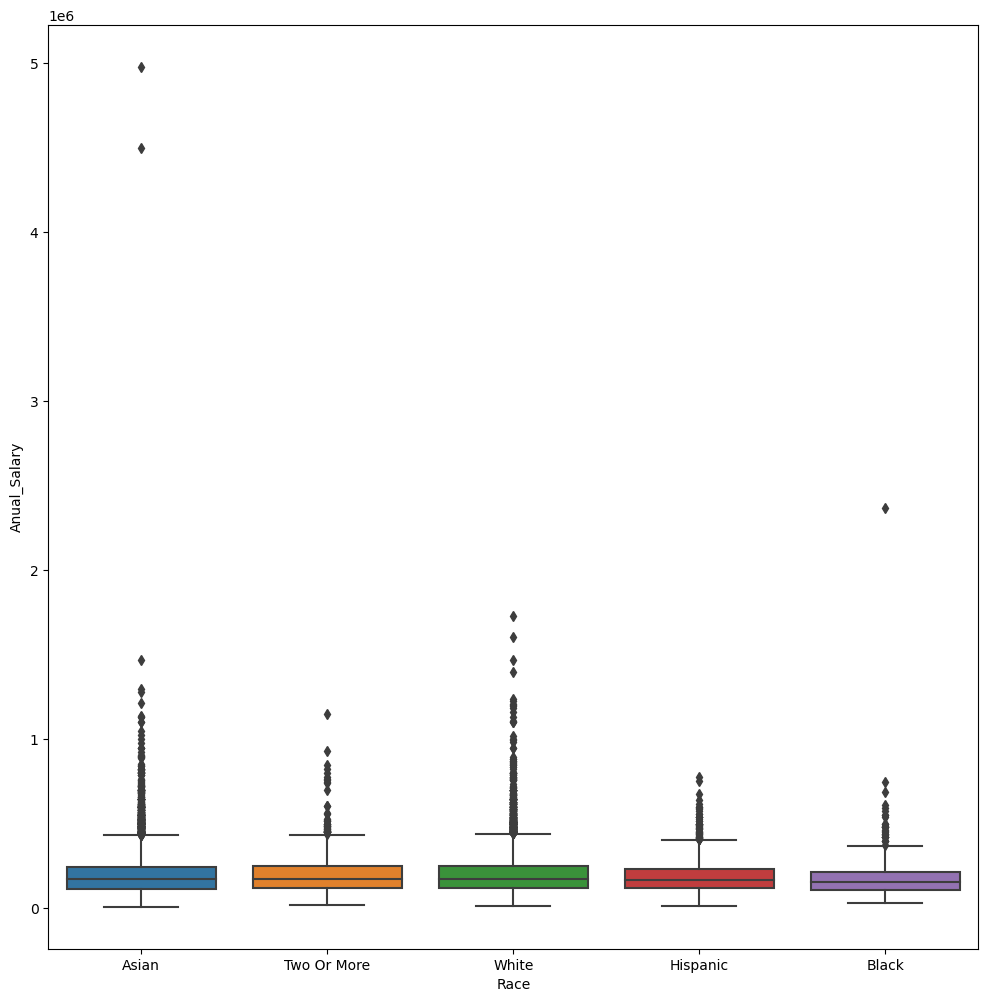

In [26]:
plt.figure(figsize=(12,12))
ax0=sns.boxplot( y='Anual_Salary', x='Race', data=df_race)
#ax0.box_label(ax0.containers[0])


En el caso de la educación, vemos que el grado de licenciado no agrega mucho valor al salario anual pues las categorías high school o algún tipo de estudio parecen superar a esta primera.

Existe cierta obviedad al ver que la agrupación de datos de personas con un Doctorado este un poco más arriba en la gráfica salaria, sin embargo su dispoersión es pobre en comparación con las personas con grado de maestría, que son los que tienen los outliers más grandes, lo cual no sdice que el tener un Doctorado si te asegura un salario alto, pero un grado de maestro junto con otras variables, posiblemente más relacionadas a lo laboral, son las variables correctas para alcanzar el máximo sueldo posible en esta industria.


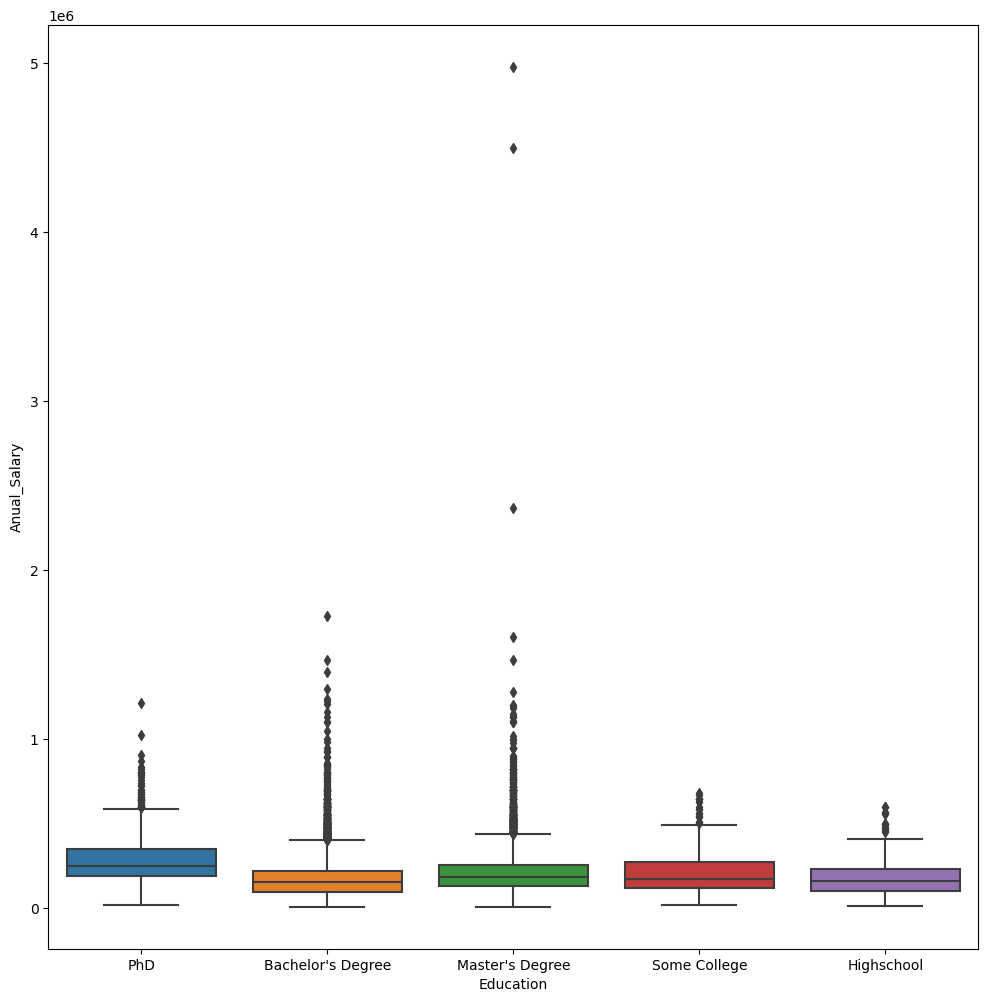

In [27]:
plt.figure(figsize=(12,12))
ax1=sns.boxplot(y='Anual_Salary', x='Education', data=df_edu)
#ax1.bar_label(ax1.containers[0])


Por último, un análisis que no incluye el salario anual directamente pero que nos hace preguntarnos más acerca de como funciona esta industria es la comparación entre la "raza" y el nivel de estudios.

En la gráfica de abajo podemos ver que en general todas las "etnias" tienen un nivel de estudio similar, sin embargo, las personas asíaticas resaltan por tener un nivel mayor de estudios que el resto; esto resulta interesante pues nos muestra que estas personas pueden estar mejor preparadas académicamente, sin embargo, eso no les garantiza un mejor sueldo, como vimos anteriormente, y reafirmando la hipótesis anterior de que un grado de maestría es más que suficiente para tener un gran sueldo en la industria Tech.

In [28]:
df_race_edu = data[['Education #', 'Race']].groupby(['Race'], as_index=False).mean().sort_values(by='Education #', ascending=True)

[Text(0, 0, '3.26217'),
 Text(0, 0, '3.28851'),
 Text(0, 0, '3.28852'),
 Text(0, 0, '3.31012'),
 Text(0, 0, '3.60689')]

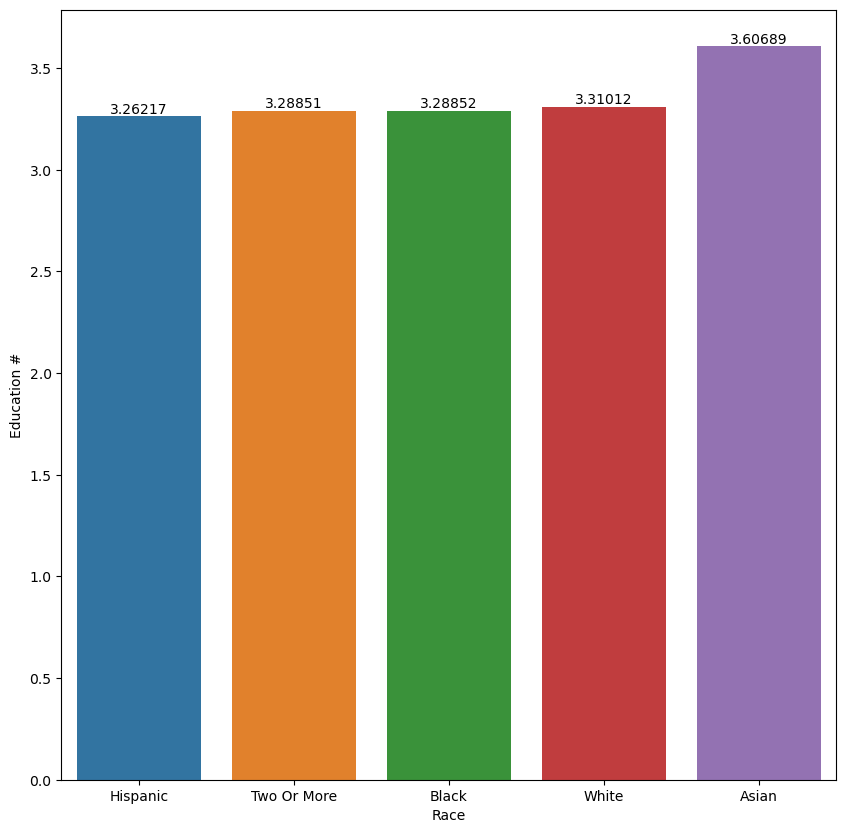

In [29]:
plt.figure(figsize=(10,10))
ax=sns.barplot(y='Education #', x='Race', data=df_race_edu)
ax.bar_label(ax.containers[0])

# Conclusiones provisionales y siguientes pasos

La industría Tech ha tenido un crecimiento desbordado desde hace algunos años, el crecimiento de la indstría 4.0 y el cada vez mayor alcance dle internet hacen que se creen fenómenos interesantes en el desarrollo de diferentes industrías tecnológicas, como el hecho de que Arabía Saudíta le gané en salarios promedio a Estados Unidos en este rubro, algo que hace algunos años hubiera sonado a broma.

Por esto es difícil encontrar patrones o entender cuales son las variables que pueden brindarte un mejor salario; la educación ya no es suficiente, alguien con estudios de secundaria puede ganar más que un licenciado, en este ámbito, y un doctorado te asegura un buen salario, sí, pero no el mejor; por ello es importante recabar más información y cruzar más variables para ver como juegan estas entre sí, y cuales son los factores a los que nos debemos enfocar, y cuales debemos comenzar a dejar de lado, como las personas asíaticas, que tal vez deban comenzar a cambiar su estrategía de carrera.

Hemos encontrado una serie de variables que parecen tener repercusión en el salario anual percibido por un empleado de la industria Tech, los siguientes pasos serán encontrar un modelo de clusterización o regresión que nos permita encontrar la mejor explicación a cuales son los factores más relevantes que ayudan a incrementar el salario siendo un trabajador de esta industria.